# Introduction
>The dataset is populated by the salary of various people along with their years of experience<br><br>
>This is the processing of `Simple Linear Regression` on a small dataset

## Table of Contents
- <a href=#read>Data Reading</a>
- <a href=#eda>Data Visualisation</a>
- <a href=#split>Data Splitting</a>
- <a href=#build>Model Building</a>
- <a href=#res>Residual Analysis</a>
- <a href=#eval>Model Evaluation</a>
- <a href=#conclusion>Conclusion</a>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

<a id="read"></a>
### Reading the dataset

In [2]:
salary = pd.read_csv("Salary.csv")
salary.shape

(35, 2)

#### Data Understanding

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [4]:
salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


`Inference:`<br>
- No null values can be found above and since both the columns are numeric, thus no need of creating new dummy variables

<a id="eda"></a>
### Visualising Dataset

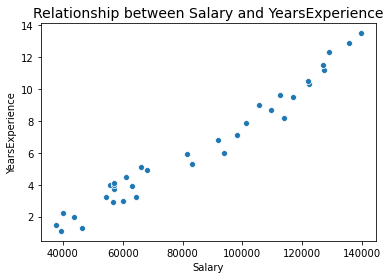

In [5]:
# visualisation between YearsExperience and Salary
sns.scatterplot(salary['Salary'],salary['YearsExperience'])
plt.title("Relationship between Salary and YearsExperience",fontsize=14)
plt.show()

`Inference:`
> A positive correlation can be seen above between salary and years of experience

<a id="split"></a>
### Splitting the Dataset
- Keeping train:test ratio of 70:30

In [6]:
X_train, X_test, y_train, y_test = train_test_split(salary['YearsExperience'], salary['Salary'],train_size=0.7,random_state=83)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24,)
(24,)
(11,)
(11,)


<a id="build"></a>
### Model building

*Using the statsmodels library for building model*<br><br>
- **Adding the intercept to the train and test data**

In [8]:
X_train_sm = sm.add_constant(X_train)
print(X_train_sm.head())
X_test_sm = sm.add_constant(X_test)
print(X_test_sm.head())

    const  YearsExperience
9     1.0              3.7
11    1.0              4.0
22    1.0              7.9
20    1.0              6.8
13    1.0              4.1
    const  YearsExperience
1     1.0              1.3
29    1.0             10.5
25    1.0              9.0
10    1.0              3.9
2     1.0              1.5


In [9]:
# model building
# X_train_sm = X_train_sm.reshape(-1,1)
lr = sm.OLS(y_train,X_train_sm)
lm_model = lr.fit()

In [10]:
lm_model.params

const              27015.288231
YearsExperience     8931.748330
dtype: float64

In [11]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     632.7
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.05e-17
Time:                        21:04:48   Log-Likelihood:                -242.10
No. Observations:                  24   AIC:                             488.2
Df Residuals:                      22   BIC:                             490.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.702e+04   2675.032     10.099      0.000    2.15e+04    3.26e+04
YearsExperience  8931.7483    355.096     25.153      0.000    8195.324    9668.173
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   2.354
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.875
Skew:                           0.328   Prob(JB):                        0.646
Kurtosis:                       2.333   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y_train_pred = lm_model.predict(X_train_sm)

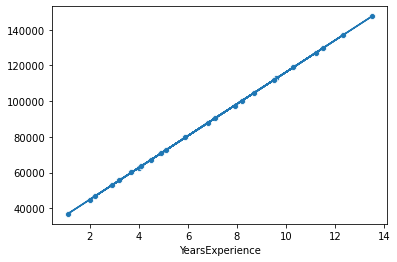

In [13]:
sns.scatterplot(X_train,y_train_pred)
plt.plot(X_train,y_train_pred)
plt.show()

<a id="res"></a>
### Residual Analysis

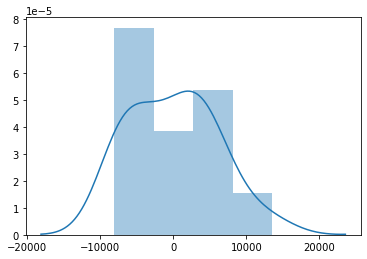

In [14]:
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

`Inference:`
- Since the training sample is less than 30 (24), so the distribution of the residuals is not normalised properly but still it can be seen that the median is around zero.

#### Using the model for predicting the target variable

In [15]:
y_test_pred = lm_model.predict(X_test_sm)
res_test = y_test - y_test_pred

<a id="eval"></a>
### Model Evaluation

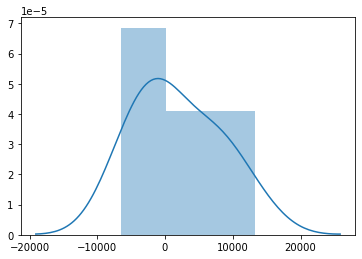

In [16]:
sns.distplot(res_test)
plt.show()

drawing a graph between the `**predicted y test**` values and `**actual y test values**`

In [17]:
y_test_pred

1      38626.561060
29    120798.645696
25    107401.023201
10     61849.106718
2      40412.910726
7      55596.882887
6      53810.533221
17     74353.554380
19     80605.778211
33    142234.841688
12     62742.281551
dtype: float64

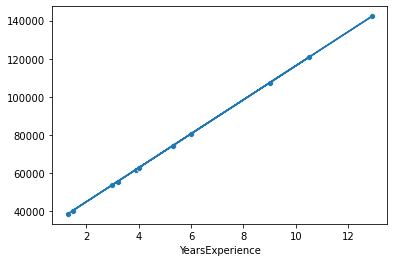

In [18]:
sns.scatterplot(X_test,y_test_pred)
plt.plot(X_test,y_test_pred)
plt.show()

In [19]:
r2_score(y_test,y_test_pred)

0.9576380295444662

`Inference:`
- The model's r$^{2}$ score is pretty high, which means the model is able to explain the relationship between the YearsExperience and Salary

<a id="conclusion"></a>
### Conclusion

- The model made was pretty accurate holding the accuracy of 95%
- The error terms were also normal despite dataset being of small size